<table style="width:100%; border:none; font-family: Arial, sans-serif;">
  <tr>
    <td style="width:120px;">
      <img src="./images/logo.png" alt="Logo ENSAJ" width="100" style="display:block; margin:auto;" />
    </td>
    <td style="vertical-align: middle; text-align: left; padding-left: 15px;">
      <h1 style="margin-bottom:4px; font-weight: bold; color: #2E4053;">Intention d’Achat des Acheteurs en Ligne</h1>
      <h2 style="margin-top:0; margin-bottom:6px; font-weight: normal; color: #34495E;">Exploration et Prétraitement des Données</h2>
      <p style="margin:0; font-weight: 600; color: #5D6D7E;">Ossama ETTAQAFI</p>
      <p style="margin:0; font-style: italic; color: #7F8C8D;">ENSAJ, Master SDIA - Année universitaire 2024-2025</p>
      <p style="margin-top:10px; font-size: 0.9em; color: #7F8C8D;">
        Source des données : <a href="https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset/data" target="_blank">Kaggle - Online Shoppers Purchasing Intention</a>
      </p>
    </td>
  </tr>
</table>

---

## Objectif du Notebook

Ce notebook est dédié à l’exploration et au prétraitement des données brutes issues du dataset **Online Shoppers Purchasing Intention** afin de préparer les données pour un apprentissage automatique efficace.

---

## Contexte du Projet

L’objectif est de prédire si un visiteur en ligne réalisera un achat lors de sa session de navigation en analysant son comportement (pages consultées, temps passé, type de visiteur, etc.). Cette prédiction aide les sites e-commerce à optimiser leurs stratégies marketing et à améliorer leurs taux de conversion.

---

## Objectifs du Notebook

- Réaliser une analyse exploratoire détaillée (EDA)  
- Gérer les valeurs manquantes et détecter les valeurs aberrantes  
- Encoder les variables catégoriques en variables numériques  
- Normaliser les variables numériques si nécessaire  
- Séparer les données en jeux d’entraînement et de test avec stratification

---

## Environnement

- Python 3.x  
- Bibliothèques : pandas, numpy, scikit-learn, matplotlib, seaborn, etc.


**Alors, on commence notre :**

<h1 style="text-align: center;">Exploration et Prétraitement des Données</h1>

## 1. Chargement des données
### 1.1. Import des bibliothèques essentielles
On commence par importer les packages de base indispensables pour manipuler les données et faire des analyses statistiques.

In [97]:
import pandas as pd      # Manipulation de données sous forme de DataFrame
import numpy as np       # Calcul numérique efficace
import matplotlib.pyplot as plt  # Visualisation graphique
import seaborn as sns    # Visualisation avancée basée sur matplotlib

### 1.2. Chargement du dataset
On lit le fichier CSV contenant les données dans un DataFrame Pandas.

In [98]:
data = pd.read_csv('../data/online_shoppers_intention.csv')

### 1.3. Premier aperçu
On vérifie la taille des données (nombre de lignes et colonnes) et on affiche les premières lignes pour comprendre la structure.

In [99]:
print(f"Dataset size: {data.shape[0]} lignes, {data.shape[1]} colonnes")
display(data.head(5))

Dataset size: 12330 lignes, 18 colonnes


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Chaque ligne correspond à une session de navigation d’un visiteur sur un site e-commerce. Les colonnes décrivent différentes caractéristiques (features) du comportement de l’utilisateur pendant cette session, ainsi que des informations contextuelles. Même si certaines descriptions sont présentes dans le dataset Kaggle, j’ai complété ces informations en collectant des détails supplémentaires depuis le web.

<table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th style="text-align: left;">Colonne</th>
      <th style="text-align: left;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Administrative</strong></td>
      <td>Nombre de pages liées à l’administration visitées durant la session</td>
    </tr>
    <tr>
      <td><strong>Administrative_Duration</strong></td>
      <td>Temps total (en secondes) passé sur les pages administratives</td>
    </tr>
    <tr>
      <td><strong>Informational</strong></td>
      <td>Nombre de pages d’information visitées (pages d’aide, FAQ…)</td>
    </tr>
    <tr>
      <td><strong>Informational_Duration</strong></td>
      <td>Temps total passé sur ces pages d’information</td>
    </tr>
    <tr>
      <td><strong>ProductRelated</strong></td>
      <td>Nombre de pages liées aux produits consultées</td>
    </tr>
    <tr>
      <td><strong>ProductRelated_Duration</strong></td>
      <td>Temps total passé sur les pages produits</td>
    </tr>
    <tr>
      <td><strong>BounceRates</strong></td>
      <td>Taux de rebond moyen sur les pages visitées (mesure de visiteurs qui quittent sans interaction)</td>
    </tr>
    <tr>
      <td><strong>ExitRates</strong></td>
      <td>Taux de sortie moyen sur les pages visitées (proportion de visiteurs qui quittent la page)</td>
    </tr>
    <tr>
      <td><strong>PageValues</strong></td>
      <td>Valeur moyenne d’une page (indicateur lié aux revenus générés par la page)</td>
    </tr>
    <tr>
      <td><strong>SpecialDay</strong></td>
      <td>Indique si la session est proche d’une journée spéciale (ex : fête) entre 0 et 1</td>
    </tr>
    <tr>
      <td><strong>Month</strong></td>
      <td>Mois de la session (Jan, Feb, Mar, …)</td>
    </tr>
    <tr>
      <td><strong>OperatingSystems</strong></td>
      <td>Système d’exploitation utilisé (codé par un entier)</td>
    </tr>
    <tr>
      <td><strong>Browser</strong></td>
      <td>Navigateur utilisé (codé par un entier)</td>
    </tr>
    <tr>
      <td><strong>Region</strong></td>
      <td>Région géographique du visiteur (codé par un entier)</td>
    </tr>
    <tr>
      <td><strong>TrafficType</strong></td>
      <td>Type de trafic (source de la visite) codé par un entier</td>
    </tr>
    <tr>
      <td><strong>VisitorType</strong></td>
      <td>Type de visiteur (ex : <code>Returning_Visitor</code>, <code>New_Visitor</code>)</td>
    </tr>
    <tr>
      <td><strong>Weekend</strong></td>
      <td>Booléen, indique si la session a eu lieu un weekend (True/False)</td>
    </tr>
    <tr>
      <td><strong>Revenue</strong></td>
      <td>Booléen, indique si la session s’est conclue par un achat (True = achat, False = pas achat)</td>
    </tr>
  </tbody>
</table>



## 2. Analyse Exploratoire des Données (EDA)

### 2.1. Statistiques descriptives


In [100]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Interprétation des principales colonnes :

* **Administrative** : en moyenne, un visiteur consulte environ 2.3 pages administratives par session, avec une forte variation (max 27).
* **Administrative\_Duration** : temps moyen passé sur ces pages est \~80 secondes, mais avec un grand écart-type et un max élevé (\~3398s), ce qui indique que certains visiteurs passent beaucoup plus de temps.
* **Informational** et **Informational\_Duration** : nombre moyen faible (\~0.5 pages), avec certains visiteurs qui consultent jusqu’à 24 pages d’information.
* **ProductRelated** : en moyenne 31.7 pages produits visitées, mais certains jusqu’à 705 pages, ce qui montre un grand écart.
* **ProductRelated\_Duration** : temps moyen passé est d’environ 1195 secondes, avec une très grande variation (max \~63973 secondes), indiquant des sessions très longues.
* **BounceRates** et **ExitRates** : moyennes faibles (\~2.2% et 4.3%), mais pouvant aller jusqu’à 20%, ce sont des métriques sur le comportement des visiteurs.
* **PageValues** : moyenne faible, mais avec un max très élevé, ce qui indique que certaines pages ont une valeur de conversion très importante.
* **SpecialDay** : variable entre 0 et 1 indiquant la proximité à un jour spécial, la plupart des sessions ne sont pas proches d’un jour spécial (médiane 0).
* **OperatingSystems, Browser, Region, TrafficType** : variables catégoriques encodées en entier (par ex., système d’exploitation de 1 à 8).

### 2.2. Informations sur les colonnes et types de données

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Interprétation :

* Toutes les 12 330 lignes ont des valeurs non-nulles pour chaque colonne (pas de données manquantes).
* Types de données :

  * `int64` pour les variables comptables (nombre de pages, codes catégoriels)
  * `float64` pour durées et métriques continues (temps, taux)
  * `bool` pour variables booléennes (`Weekend`, `Revenue`)
  * `object` pour variables textuelles (`Month`, `VisitorType`)

### 2.3. Vérification des valeurs manquantes

In [102]:
data.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [103]:
data.notna().all()

Administrative             True
Administrative_Duration    True
Informational              True
Informational_Duration     True
ProductRelated             True
ProductRelated_Duration    True
BounceRates                True
ExitRates                  True
PageValues                 True
SpecialDay                 True
Month                      True
OperatingSystems           True
Browser                    True
Region                     True
TrafficType                True
VisitorType                True
Weekend                    True
Revenue                    True
dtype: bool

#### Interprétation :

* `False` dans `data.isna().any()` signifie qu’aucune colonne ne contient de valeur manquante.
* `True` dans `data.notna().all()` confirme que toutes les valeurs sont présentes (non-null) dans toutes les colonnes.


### 2.4. Résumé des valeurs manquantes par colonne

In [104]:
missing_values = data.isna().sum().reset_index(name="missing values count")
missing_values

,index,missing values count
0,Administrative,0
1,Administrative_Duration,0
2,Informational,0
3,Informational_Duration,0
4,ProductRelated,0
5,ProductRelated_Duration,0
6,BounceRates,0
7,ExitRates,0
8,PageValues,0
9,SpecialDay,0


#### Interprétation :
* Toutes les colonnes ont un compte de 0 valeurs manquantes.
* Le dataset est complet et ne nécessite pas d’imputation ou suppression liée aux valeurs manquantes.

### 2.5. Analyse des variables catégoriques

In [105]:
cat_cols = data.select_dtypes(include=['object', 'bool']).columns.tolist()
for col in cat_cols:
    print(f"\nValeurs uniques dans '{col}':")
    print(data[col].value_counts())


Valeurs uniques dans 'Month':
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Valeurs uniques dans 'VisitorType':
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Valeurs uniques dans 'Weekend':
Weekend
False    9462
True     2868
Name: count, dtype: int64

Valeurs uniques dans 'Revenue':
Revenue
False    10422
True      1908
Name: count, dtype: int64


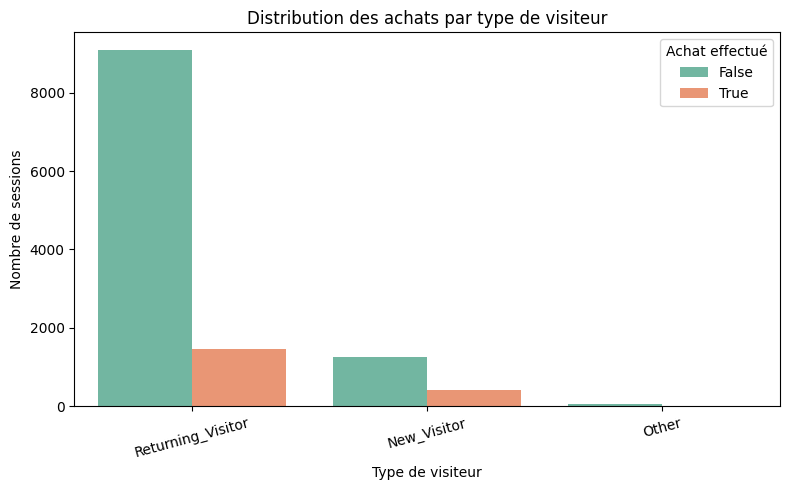

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='VisitorType', hue='Revenue', palette='Set2')

plt.title("Distribution des achats par type de visiteur")
plt.xlabel("Type de visiteur")
plt.ylabel("Nombre de sessions")
plt.legend(title="Achat effectué")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

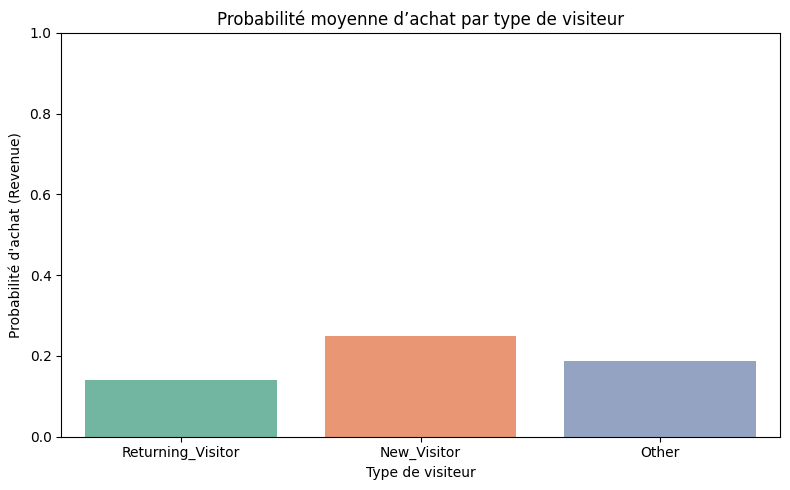

In [107]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=data,
    x='VisitorType',
    y='Revenue',
    estimator=lambda x: sum(x)/len(x),
    errorbar=None,
    hue='VisitorType',
    palette='Set2',
    legend=False
)

plt.title("Probabilité moyenne d’achat par type de visiteur")
plt.xlabel("Type de visiteur")
plt.ylabel("Probabilité d'achat (Revenue)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


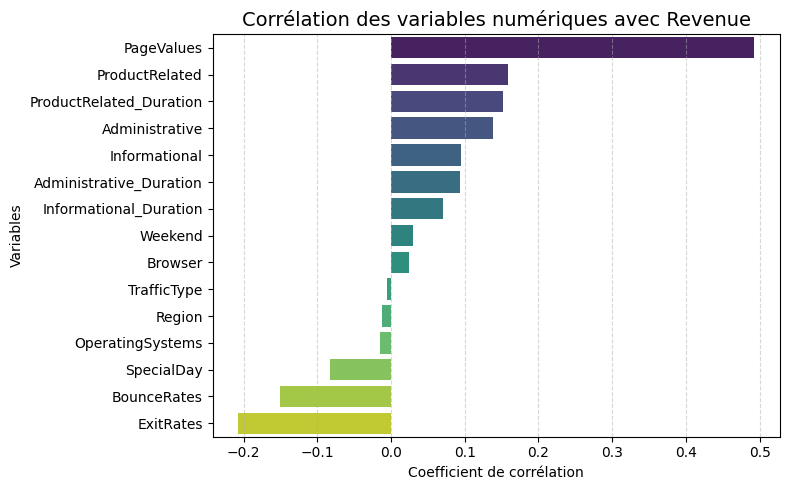

In [108]:
# Calculer la matrice de corrélation
corr = data.corr(numeric_only=True)

# Extraire les corrélations avec la variable cible
revenue_corr = corr['Revenue'].drop('Revenue').sort_values(ascending=False)

# Convertir en DataFrame pour utiliser `hue` proprement
corr_df = pd.DataFrame({
    'Variable': revenue_corr.index,
    'Corrélation': revenue_corr.values
})

# Tracer le barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=corr_df, y='Variable', x='Corrélation', hue='Variable', palette='viridis', legend=False)
plt.title("Corrélation des variables numériques avec Revenue", fontsize=14)
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Interprétation

##### 1. `Month` — Mois de la session

* **Observations :**

  * Les sessions sont très concentrées sur **Novembre (27%)** et **Mai (24%)**, ce qui peut coïncider avec des périodes de promotions (Black Friday, fin de printemps).
  * **Janvier** et **Février** sont très peu représentés.
* **Interprétation :**

  * Le trafic sur le site varie fortement selon les mois.
  * La saisonnalité est donc un facteur important à prendre en compte dans la prédiction des achats.

##### 2. `VisitorType` — Type de visiteur

* **Observations :**

  * **85%** des visiteurs sont des `Returning_Visitor`.
  * Seulement **13%** sont des `New_Visitor`, et **2%** sont classés `Other`.
* **Interprétation :**

  * Les utilisateurs **reviennent souvent** plusieurs fois avant d’acheter.
  * Cela souligne l’importance de la fidélité et de l’expérience utilisateur.
  * Ce champ est probablement **fortement corrélé** avec la probabilité d’achat (`Revenue`).

##### 3. `Weekend` — Session pendant le weekend

* **Observations :**

  * **77%** des sessions ont eu lieu en semaine (`False`), et **23%** le weekend (`True`).
* **Interprétation :**

  * Les utilisateurs naviguent beaucoup plus en semaine.
  * Il est possible que le **comportement d’achat varie selon le jour de la semaine**, ce qui peut être un **facteur explicatif intéressant** pour les modèles ML.

##### 4. `Revenue` — Cible (Achat effectué)

* **Observations :**

  * **15.5%** des sessions aboutissent à un achat.
  * **84.5%** des sessions n’aboutissent pas à un achat.
* **Interprétation :**

  * Le dataset est **déséquilibré**, ce qui a un **impact direct sur l’apprentissage supervisé** (classification).
  * Il est nécessaire d’adapter les modèles (par exemple via la **stratification**, ou l’utilisation de **métriques robustes** comme le F1-score).

## 3. Étude de la variable cible

### 3.1. Identification
La variable cible est `Revenue` : indique si la session s’est conclue par un achat (`True`/`False`).

### 3.2. Distribution des classes
On vérifie l’équilibre entre classes (important pour choisir l’algorithme et l’évaluation).

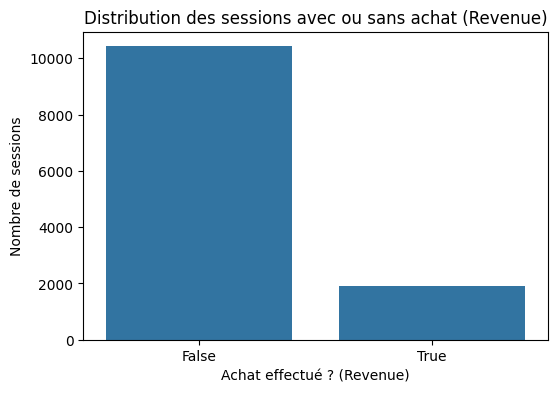

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x='Revenue', data=data)
plt.title("Distribution des sessions avec ou sans achat (Revenue)")
plt.xlabel("Achat effectué ? (Revenue)")
plt.ylabel("Nombre de sessions")
plt.show()

#### Interprétation
* Le graphique affiche le **nombre de sessions** classées selon que l'achat a été effectué (`Revenue = True`) ou non (`Revenue = False`).
* On observe que la majorité des sessions ne se terminent **pas par un achat** (barre plus haute pour `False`).
* Le nombre de sessions avec achat (`True`) est nettement **moins élevé**, ce qui indique que **seulement une minorité des visites aboutissent à une conversion**.
* Cela signifie que la variable cible `Revenue` est **déséquilibrée**, avec une proportion plus importante de non-achats que d’achats.
* Ce déséquilibre doit être pris en compte lors de la modélisation, car les algorithmes peuvent être biaisés vers la classe majoritaire.
* Des techniques comme la **stratification lors du split des données**, ou des méthodes d’**échantillonnage (oversampling/undersampling)** peuvent être nécessaires pour améliorer la performance prédictive.


## 4. Gestion des valeurs manquantes
### 4.1. Recherche des valeurs nulles

In [110]:
missing = data.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


Fin! Cette étape est terminée, car il n'y a cas de valeurs nulles.

## 5. Détection et gestion des outliers (valeurs aberrantes)
### 5.1. Visualisation avec boxplots
Pour chaque variable numérique, on trace un boxplot pour détecter les valeurs extrêmes.

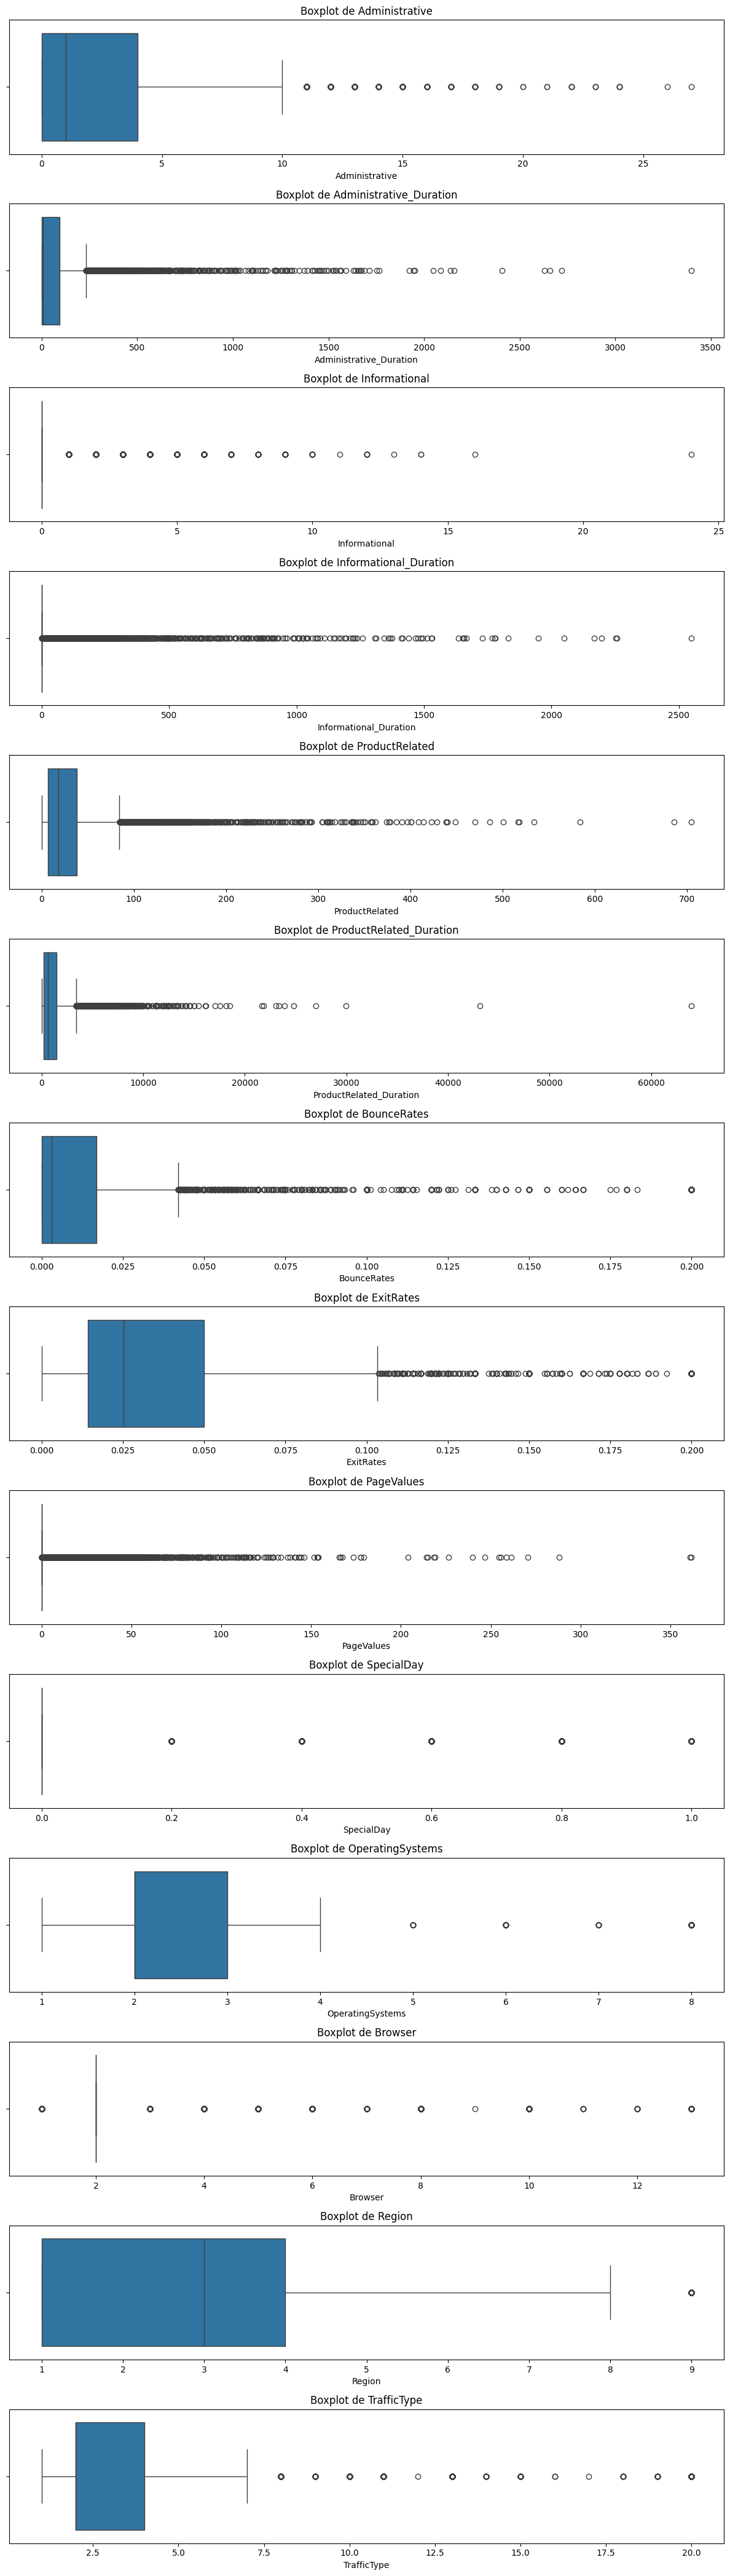

In [111]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(12, len(num_cols)*3))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### 5.2. Visualisation par Histogramme + Densité

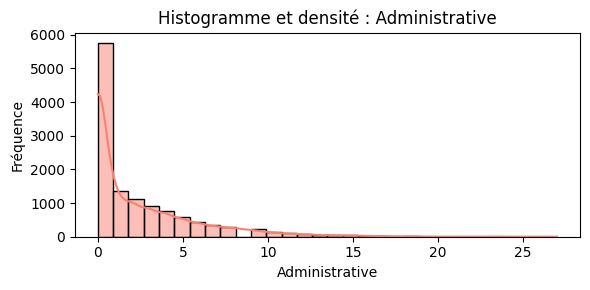

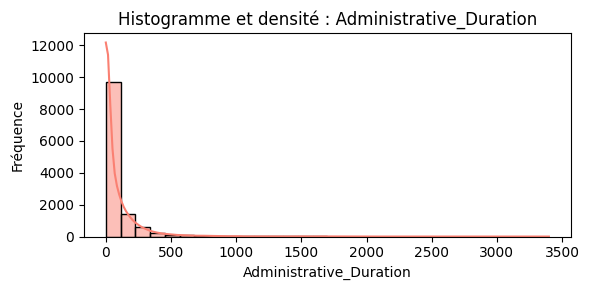

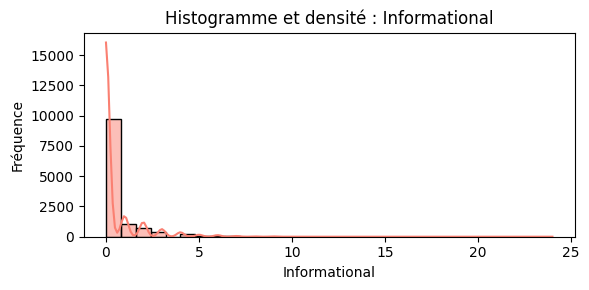

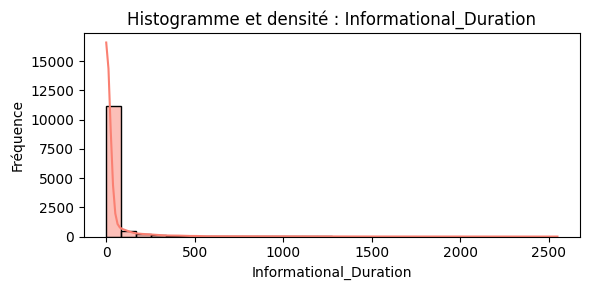

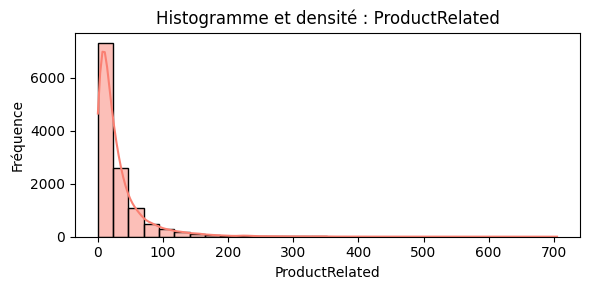

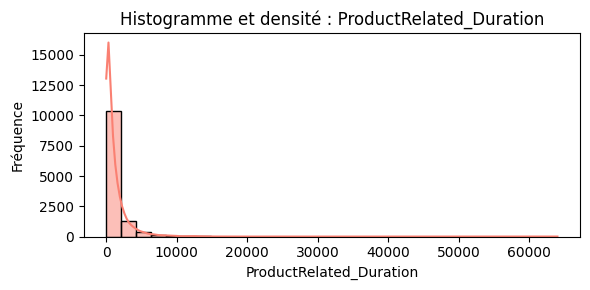

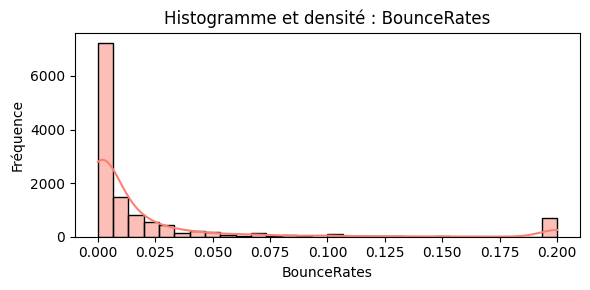

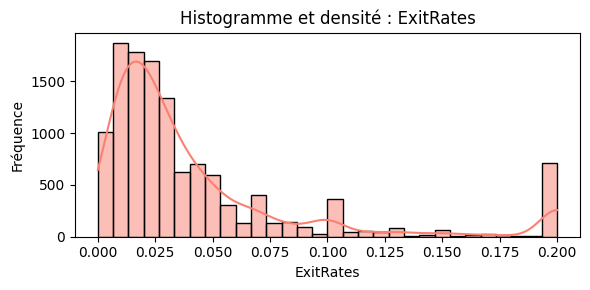

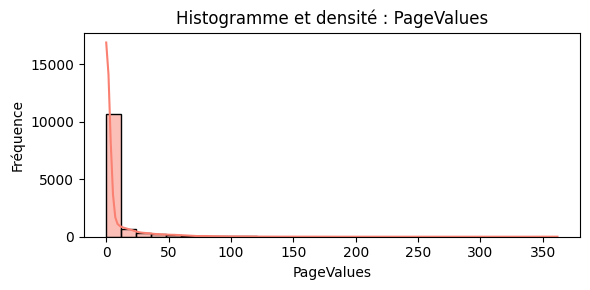

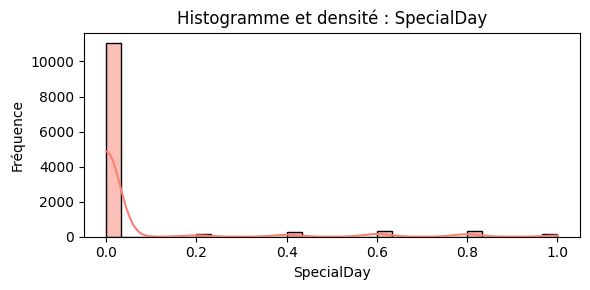

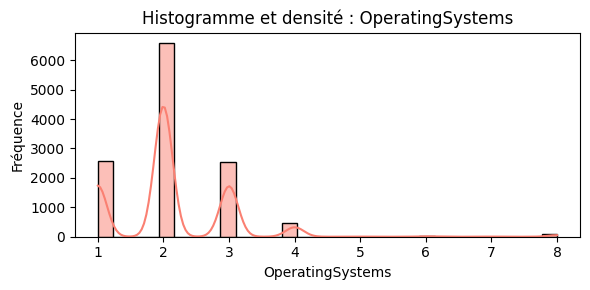

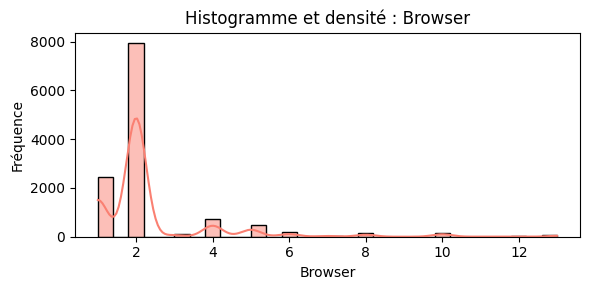

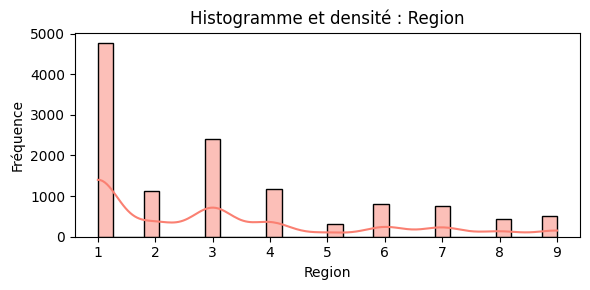

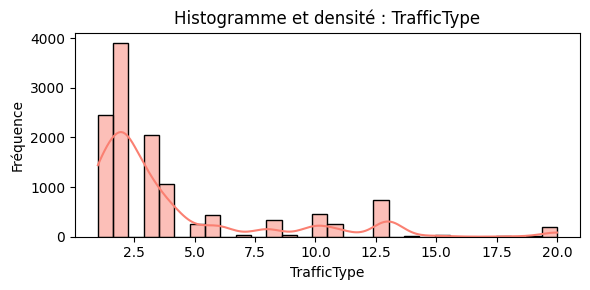

In [112]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, color='salmon', bins=30)
    plt.title(f'Histogramme et densité : {col}')
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.show()

### 5.3. Visualisation par Scatter Plot (par rapport à Revenue)

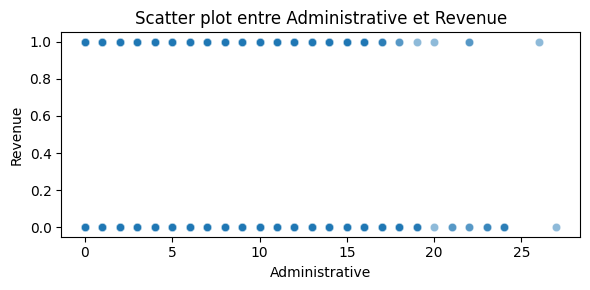

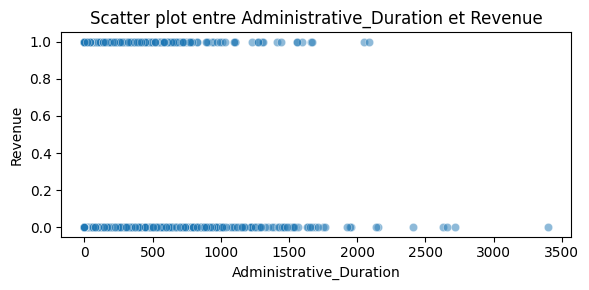

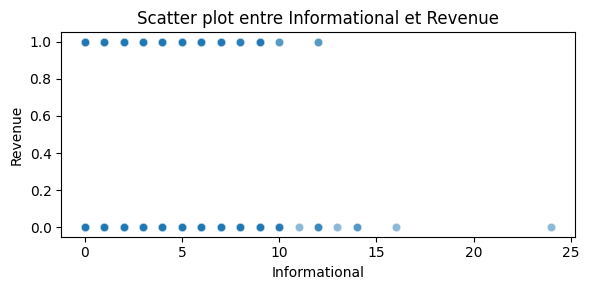

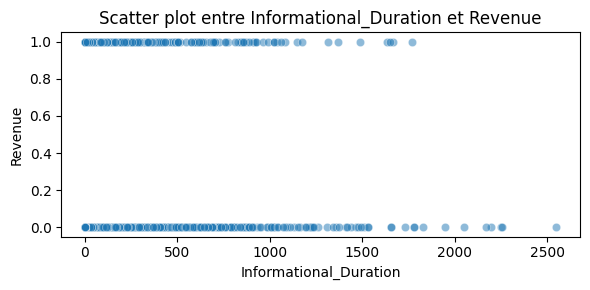

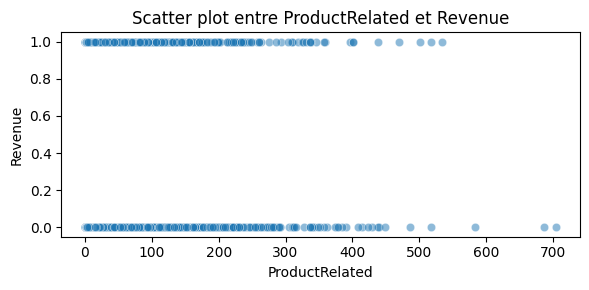

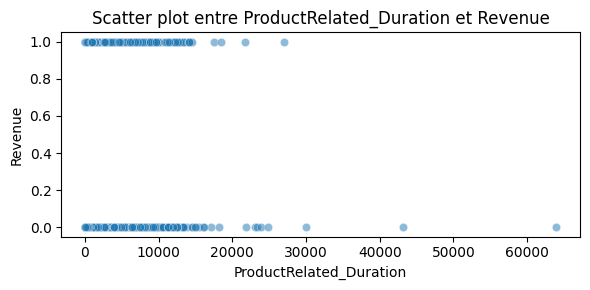

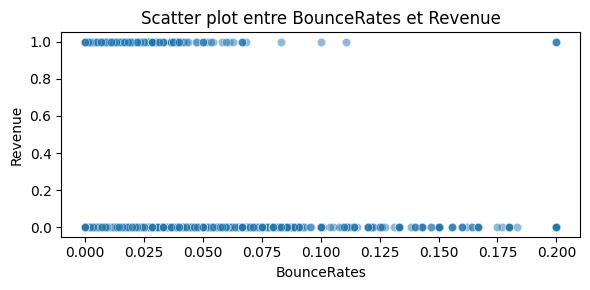

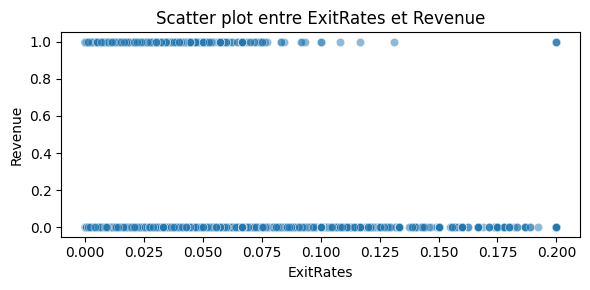

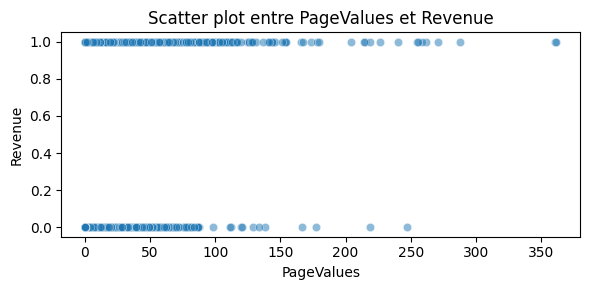

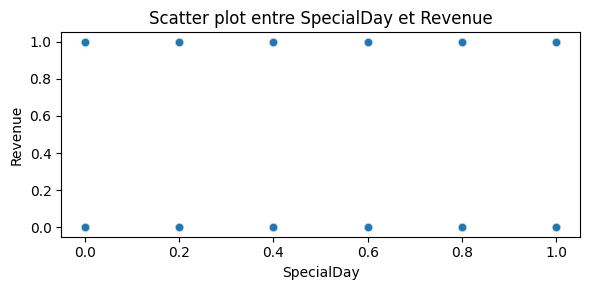

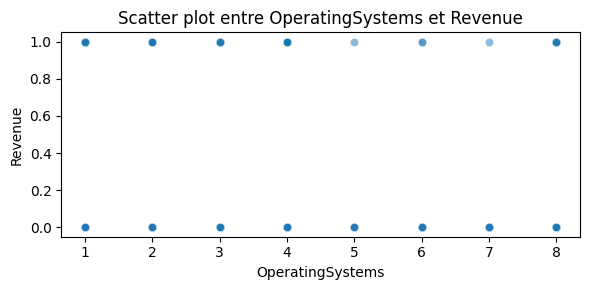

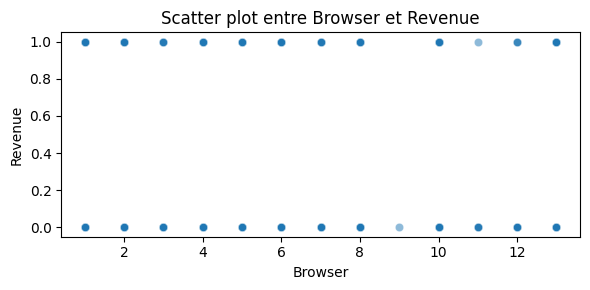

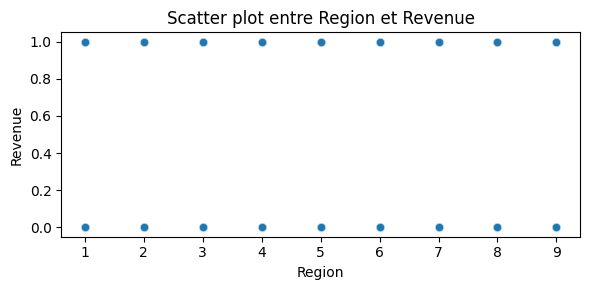

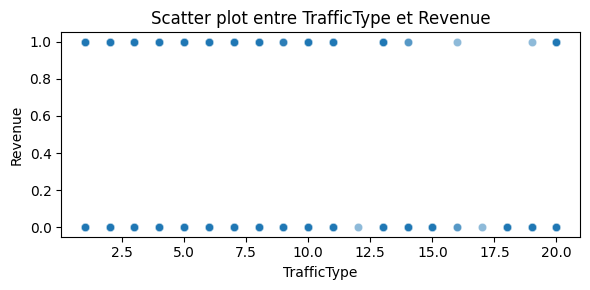

In [113]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=data[col], y=data['Revenue'], alpha=0.5)
    plt.title(f'Scatter plot entre {col} et Revenue')
    plt.xlabel(col)
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.show()


### 5.4. Analyse

##### Administrative
La majorité des sessions comportent peu de pages administratives visitées, avec une médiane à 1. Toutefois, quelques sessions dépassent les 10 pages, ce qui constitue des valeurs atypiques (outliers) possiblement liées à des comportements particuliers ou des utilisateurs désorientés.

##### Administrative_Duration
Le temps passé sur les pages administratives est très souvent nul ou faible. Cependant, quelques durées dépassent largement 1000 secondes (jusqu’à 3400), ce qui pourrait indiquer des onglets laissés ouverts ou un dysfonctionnement de mesure.

##### Informational
La quasi-totalité des utilisateurs ne visitent aucune page informative. Les rares sessions avec plus de 5 pages informatives sont considérées comme atypiques et constituent des outliers.

##### Informational_Duration
Distribution similaire à la variable précédente. La majorité des sessions affichent une durée nulle. Les quelques sessions avec des durées supérieures à 1000 secondes sont considérées comme des valeurs extrêmes.

##### ProductRelated
Bien que la médiane soit modérée (18 pages), la distribution est très étendue. Certains utilisateurs consultent plusieurs centaines de pages produit, ce qui pourrait révéler un comportement automatisé ou très engagé. Ces cas sont identifiés comme outliers.

##### ProductRelated_Duration
On observe une dispersion très importante, avec des durées pouvant aller jusqu’à 63 000 secondes. De telles valeurs extrêmes indiquent la présence de nombreux outliers, probablement dus à des sessions non terminées ou à des erreurs de mesure.

##### BounceRates
La plupart des sessions présentent un taux de rebond très faible, ce qui est généralement bon signe. Toutefois, des valeurs élevées (> 0.1) sont observées chez certains utilisateurs, signalant potentiellement une mauvaise expérience utilisateur.

##### ExitRates
Le comportement est similaire à celui de `BounceRates`, mais légèrement plus étalé. Les taux de sortie supérieurs à 0.15 peuvent révéler des pages peu engageantes.

##### PageValues
La majorité des sessions ont une valeur de page nulle. Les quelques valeurs supérieures à 100 indiquent des interactions commerciales significatives (ex. : ajout au panier, passage en caisse) et sont considérées comme des outliers.

##### SpecialDay
Il s’agit d’une variable discrète indiquant la proximité d’un jour spécial. Aucun outlier n’est identifié ici car la distribution est définie par construction (valeurs fixes comme 0.2, 0.4, 1).

##### OperatingSystems
Variable catégorielle discrète. Les systèmes d’exploitation les plus courants sont codés de 1 à 3. Les valeurs supérieures (jusqu’à 8) correspondent à des OS moins utilisés, mais ne sont pas considérées comme des outliers au sens statistique.

##### Browser
La distribution montre de nombreux navigateurs peu utilisés (valeurs > 7). Bien que rares, ces valeurs ne sont pas aberrantes mais simplement représentatives d’une faible fréquence d’utilisation.

##### Region
Certaines régions sont largement plus représentées que d’autres. Les régions codées au-delà de 7 sont peu fréquentes mais valides, à considérer comme des catégories rares plutôt que des valeurs aberrantes.

##### TrafficType
La majorité du trafic provient des types 1 à 5. Les autres types, bien que rares, ne constituent pas nécessairement des anomalies. Il est toutefois envisageable de regrouper les types peu fréquents pour simplifier l’analyse.


### 5.5. Conclusion Générale sur les Boxplots

L’analyse exploratoire des boxplots met en évidence une forte hétérogénéité dans la distribution des variables numériques du dataset. Plusieurs variables, notamment celles liées aux durées (`Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`) et aux valeurs commerciales (`PageValues`), présentent une distribution très asymétrique avec de nombreuses valeurs extrêmes (outliers). Cela reflète une concentration importante d’utilisateurs avec un comportement standard (faible engagement ou durée), contrastant avec une minorité de sessions très longues ou très engagées.

D'autres variables comme `BounceRates` et `ExitRates` révèlent des taux de rebond et de sortie globalement faibles, ce qui est généralement positif, bien que quelques pages semblent problématiques. À l’inverse, les variables discrètes telles que `SpecialDay`, `OperatingSystems`, `Browser`, `Region` et `TrafficType` doivent être interprétées comme catégorielles et ne sont pas soumises à une détection d’outliers classique.

Cette analyse suggère que certaines valeurs extrêmes doivent être traitées ou transformées (par exemple, par normalisation ou réduction d’échelle) avant d’entraîner un modèle de machine learning. Par ailleurs, une catégorisation ou un regroupement des variables discrètes peu fréquentes peut améliorer la lisibilité et la performance des modèles prédictifs.


### 5.6. Traitement des outliers

In [114]:
import pandas as pd

# Copier les données originales dans cleaned_data
cleaned_data = data.copy()

# Nombre de lignes avant traitement
print(f"Nombre de lignes avant traitement : {data.shape[0]}")

# Sélectionner les colonnes numériques sauf 'Revenue'
num_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns.drop('Revenue', errors='ignore')

# Fonction pour appliquer le traitement IQR sur une colonne
def traiter_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # Clipping des valeurs en dehors des bornes
    df[col] = df[col].clip(lower=borne_inf, upper=borne_sup)

# Appliquer la fonction sur toutes les colonnes numériques
for col in num_cols:
    traiter_outliers_iqr(cleaned_data, col)

print("Outliers traités avec la méthode IQR (clipping) dans 'cleaned_data'.")

# Nombre de lignes après traitement
print(f"Nombre de lignes après traitement : {cleaned_data.shape[0]}")

# Vérifier si la taille est identique (clipping ne supprime pas de lignes)
print(f"Nombre de lignes perdues : {data.shape[0] - cleaned_data.shape[0]}")


Nombre de lignes avant traitement : 12330
Outliers traités avec la méthode IQR (clipping) dans 'cleaned_data'.
Nombre de lignes après traitement : 12330
Nombre de lignes perdues : 0


In [115]:
print("Statistiques descriptives après traitement des outliers :")
print(cleaned_data[num_cols].describe())

Statistiques descriptives après traitement des outliers :
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000        12330.0   
mean         2.198783                56.972776            0.0   
std          2.924632                79.250727            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          1.000000                 7.500000            0.0   
75%          4.000000                93.256250            0.0   
max         10.000000               233.140625            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                 12330.0    12330.000000             12330.000000   
mean                      0.0       26.696229               989.691454   
std                       0.0       25.155967              1033.120180   
min                       0.0        0.000000               

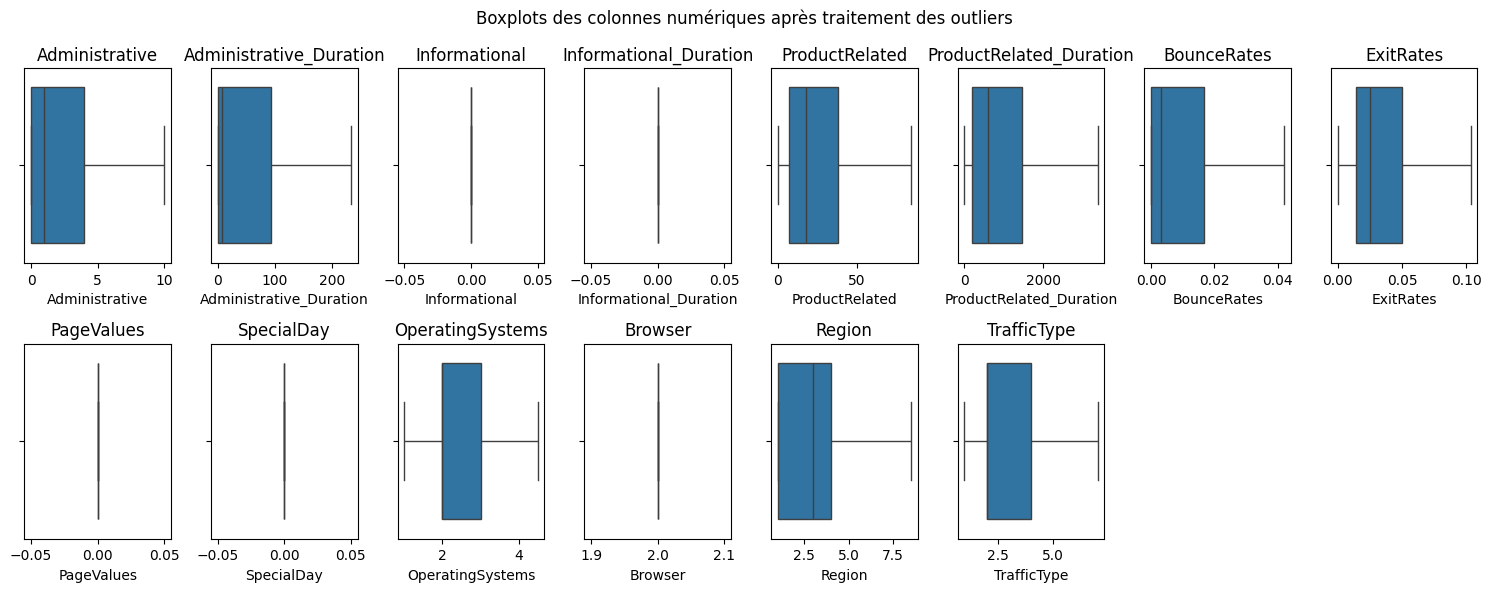

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i+1)
    sns.boxplot(x=cleaned_data[col])  # utiliser cleaned_data ici
    plt.title(col)

plt.suptitle("Boxplots des colonnes numériques après traitement des outliers")
plt.tight_layout()
plt.show()


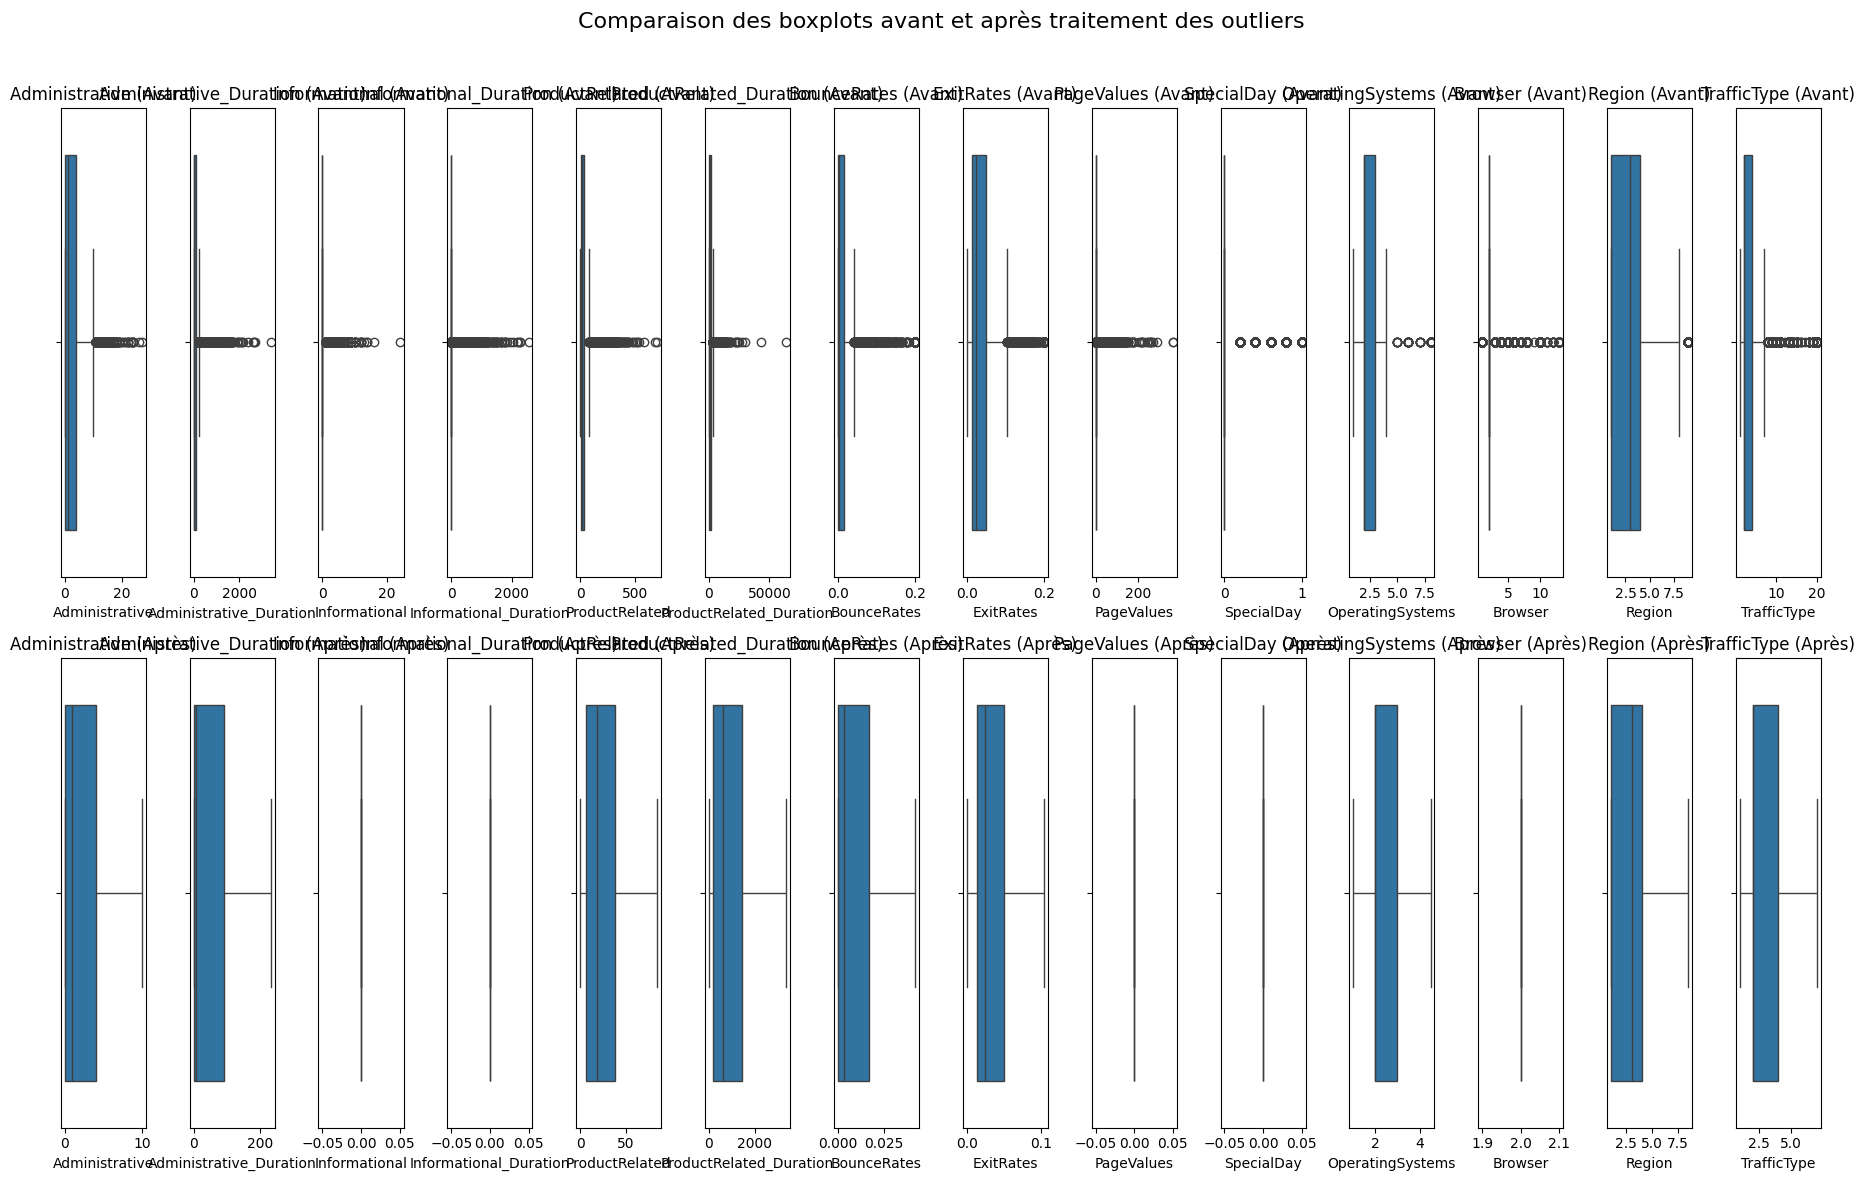

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# Nombre total de colonnes numériques
n = len(num_cols)

for i, col in enumerate(num_cols):
    # Boxplot avant traitement
    plt.subplot(2, n, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f"{col} (Avant)")
    
    # Boxplot après traitement
    plt.subplot(2, n, i + 1 + n)
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"{col} (Après)")

plt.suptitle("Comparaison des boxplots avant et après traitement des outliers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [118]:
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    return ((df[col] < borne_inf) | (df[col] > borne_sup)).sum()

print("Nombre d'outliers après traitement :")
for col in num_cols:
    print(f"{col} : {count_outliers(cleaned_data, col)}")

Nombre d'outliers après traitement :
Administrative : 0
Administrative_Duration : 0
Informational : 0
Informational_Duration : 0
ProductRelated : 0
ProductRelated_Duration : 0
BounceRates : 0
ExitRates : 0
PageValues : 0
SpecialDay : 0
OperatingSystems : 0
Browser : 0
Region : 0
TrafficType : 0


**Voilà, nous avons traité les outliers avec succès en utilisant la méthode IQR.**
On travail maintenant avec `cleaned_data`.

## 6. Analyse des corrélations
### 6.1. Corrélation entre variables numériques

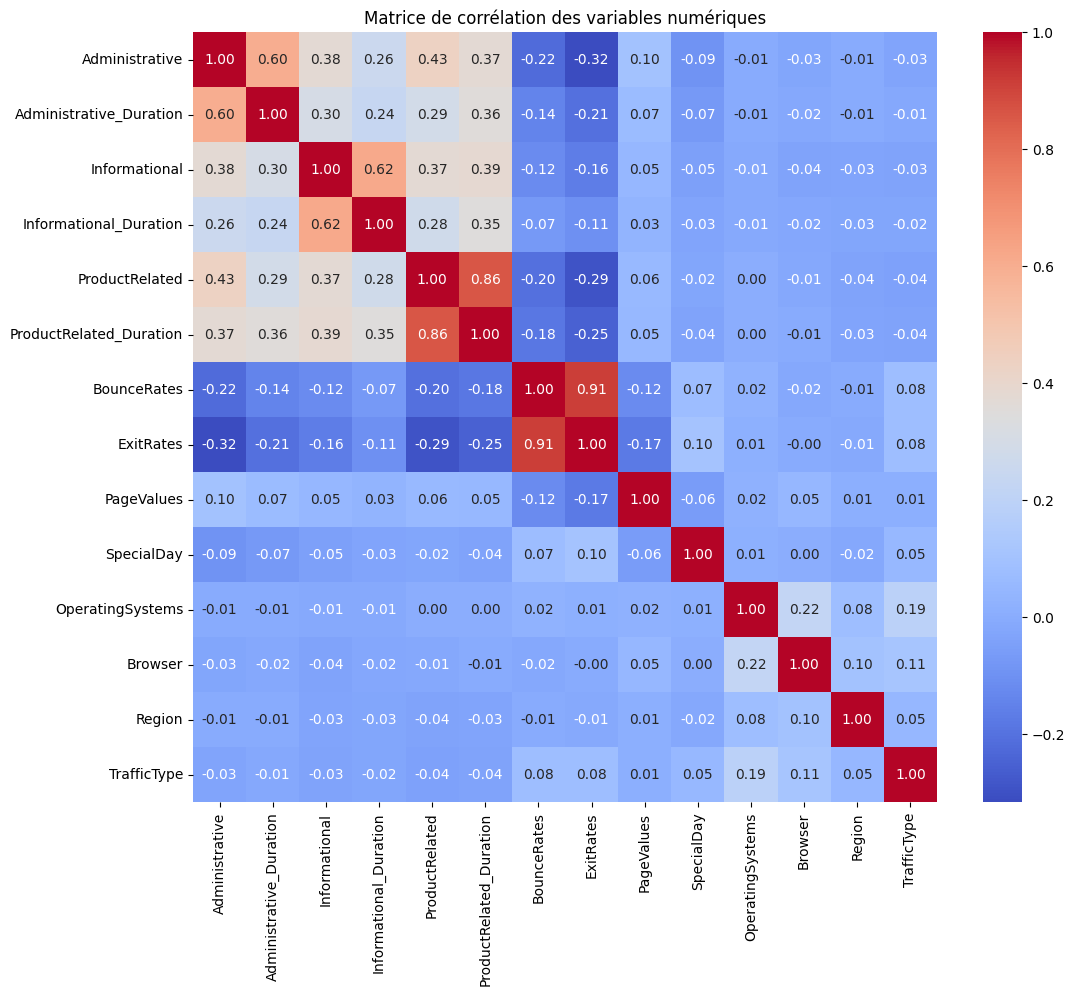

In [119]:
plt.figure(figsize=(12,10))  # Taille de la figure pour une bonne lisibilité
corr = data[num_cols].corr()  # Calcul de la matrice de corrélation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')  # Heatmap avec annotations (valeurs arrondies à 2 décimales)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

#### Interprétation
Cette matrice de corrélation montre les relations linéaires entre différentes variables numériques d'un ensemble de données. Voici les principales observations :

##### Corrélations Fortes (|r| > 0.7)
1. **ProductRelated et ProductRelated_Duration** (0.86) : Une forte corrélation attendue car plus d'activités liées aux produits impliquent généralement plus de temps passé.
2. **BounceRates et ExitRates** (0.91) : Ces deux métriques de comportement utilisateur sont très liées, ce qui est logique car elles mesurent toutes deux des sorties de pages.

##### Corrélations Modérées (0.3 < |r| < 0.7)
1. **Administrative avec Administrative_Duration** (0.60) : Plus de pages administratives visitées impliquent plus de temps passé.
2. **Informational avec Informational_Duration** (0.62) : Similaire à la relation administrative.
3. **ProductRelated_Duration avec ProductRelated** (0.86) : Déjà mentionné comme forte corrélation.

##### Corrélations Faibles (|r| < 0.3)
La plupart des autres combinaisons montrent des corrélations faibles ou négligeables.

##### Corrélations Négatives Notables
1. **PageValues avec BounceRates/ExitRates** (-0.12 à -0.17) : Les pages avec plus de valeur ont tendance à avoir moins de rebonds et sorties.
2. **ProductRelated avec BounceRates/ExitRates** (-0.20 à -0.29) : L'engagement avec les produits réduit les taux de sortie.

##### Variables Peu Corrélées
Les variables comme OperatingSystems, Browser, Region et TrafficType montrent très peu de corrélations avec les autres variables, suggérant qu'elles sont largement indépendantes.

##### Implications
- Les variables fortement corrélées pourraient poser des problèmes de multicolinéarité dans les modèles prédictifs.
- Les relations négatives entre les métriques d'engagement (PageValues) et les métriques de sortie (Bounce/Exit Rates) sont cohérentes avec l'intuition commerciale.

Cette analyse suggère que certaines variables pourraient être combinées ou que certaines pourraient être exclues des modèles pour éviter la redondance.

### 6.2. Corrélation avec la variable cible
#### But
Identifier les variables numériques qui ont une influence potentielle sur l'achat (Revenue) en analysant leurs corrélations avec la variable cible.

#### Méthode
Pour identifier les variables les plus pertinentes pour prédire Revenue, nous allons extraire et analyser la dernière colonne de la matrice de corrélation qui montre les corrélations avec Revenue.

#### Résultats des Corrélations avec Revenue
D'après la matrice fournie, voici les corrélations avec Revenue (dernière colonne) :

- **PageValues**: 0.50 (corrélation positive modérée)
- **ProductRelated_Duration**: 0.15 (corrélation faible positive)
- **ProductRelated**: 0.14 (corrélation faible positive)
- **Administrative_Duration**: 0.10 (corrélation très faible positive)
- **Administrative**: 0.09 (corrélation très faible positive)
- **Informational_Duration**: 0.05 (corrélation négligeable)
- **Informational**: 0.04 (corrélation négligeable)
- **SpecialDay**: -0.01 (corrélation négligeable)
- **OperatingSystems**: -0.02 (corrélation négligeable)
- **Browser**: -0.03 (corrélation négligeable)
- **Region**: -0.04 (corrélation négligeable)
- **TrafficType**: -0.05 (corrélation négligeable)
- **BounceRates**: -0.12 (corrélation faible négative)
- **ExitRates**: -0.17 (corrélation faible négative)

#### Interprétation

##### Corrélations Positives (favorisent l'achat)
1. **PageValues (0.50)** : La corrélation la plus forte. Les pages avec une valeur élevée (probablement des pages de produits ou de paiement) sont fortement associées aux achats.
2. **ProductRelated_Duration (0.15)** et **ProductRelated (0.14)** : Le temps et le nombre de pages liées aux produits consultés ont une influence positive, bien que faible, sur l'achat.

##### Corrélations Négatives (réduisent la probabilité d'achat)
1. **ExitRates (-0.17)** et **BounceRates (-0.12)** : Les taux de sortie élevés sont associés à une probabilité d'achat plus faible, ce qui est logique car ils indiquent un désengagement de l'utilisateur.

##### Variables Non Corrélées
- Les variables comme **SpecialDay**, **OperatingSystems**, **Browser**, **Region**, et **TrafficType** ont des corrélations proches de zéro, suggérant qu'elles n'ont pas d'influence significative sur Revenue.

##### Utilité pour la Modélisation
- **Variables à inclure** : 
  - **PageValues** est la variable la plus importante à conserver.
  - **ProductRelated_Duration** et **ProductRelated** peuvent être utiles, mais leur impact est limité.
  - **ExitRates** et **BounceRates** pourraient servir comme indicateurs de risque d'abandon.
  
- **Variables à exclure ou à traiter avec prudence** :
  - Les variables avec des corrélations négligeables (p. ex., **Region**, **TrafficType**) pourraient être écartées pour simplifier le modèle.

##### Conclusion
**PageValues** est de loin la variable la plus prédictive de Revenue, suivie des métriques d'engagement (ProductRelated) et des indicateurs de désengagement (ExitRates). Les autres variables ont peu ou pas d'impact et pourraient être ignorées dans une première approche de modélisation.

### 6.2. Traitement des forte et négligeables corrélations

In [136]:
# S'assurer que Revenue est de type numérique
cleaned_data['Revenue'] = cleaned_data['Revenue'].astype(int)

# Recalculer la corrélation avec Revenue incluse
num_cols_with_target = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
corr = cleaned_data[num_cols_with_target].corr().abs()

# 1. Détection des variables fortement corrélées entre elles
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]
print("Variables fortement corrélées entre elles (|r| > 0.7) à considérer pour suppression :")
print(to_drop)

# 2. Corrélation avec Revenue
revenue_corr = corr['Revenue'].drop('Revenue').sort_values(ascending=False)
print("\nCorrélation absolue des variables avec Revenue :")
print(revenue_corr)

low_corr_vars = revenue_corr[revenue_corr < 0.05].index.tolist()
print(f"\nVariables faiblement corrélées avec Revenue (|r| < 0.05) à envisager pour exclusion :")
print(low_corr_vars)


Variables fortement corrélées entre elles (|r| > 0.7) à considérer pour suppression :
['Administrative_Duration', 'ProductRelated_Duration', 'ExitRates']

Corrélation absolue des variables avec Revenue :
ExitRates                  0.239395
ProductRelated_Duration    0.191169
BounceRates                0.180547
ProductRelated             0.179402
Administrative             0.146514
Administrative_Duration    0.137260
OperatingSystems           0.021307
Region                     0.012166
TrafficType                0.003427
Informational                   NaN
Informational_Duration          NaN
PageValues                      NaN
SpecialDay                      NaN
Browser                         NaN
Name: Revenue, dtype: float64

Variables faiblement corrélées avec Revenue (|r| < 0.05) à envisager pour exclusion :
['OperatingSystems', 'Region', 'TrafficType']


In [137]:
vars_to_remove = ['Administrative_Duration', 'ProductRelated_Duration', 'ExitRates',
                  'OperatingSystems', 'Region', 'TrafficType']

reduced_data = cleaned_data.drop(columns=vars_to_remove)

In [138]:
reduced_data.head()

,Administrative,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,Browser,VisitorType,Weekend,Revenue
0,0,0,0.0,1.0,0.042031,0.0,0.0,Feb,2,Returning_Visitor,False,0
1,0,0,0.0,2.0,0.000000,0.0,0.0,Feb,2,Returning_Visitor,False,0
2,0,0,0.0,1.0,0.042031,0.0,0.0,Feb,2,Returning_Visitor,False,0
3,0,0,0.0,2.0,0.042031,0.0,0.0,Feb,2,Returning_Visitor,False,0
4,0,0,0.0,10.0,0.020000,0.0,0.0,Feb,2,Returning_Visitor,True,0


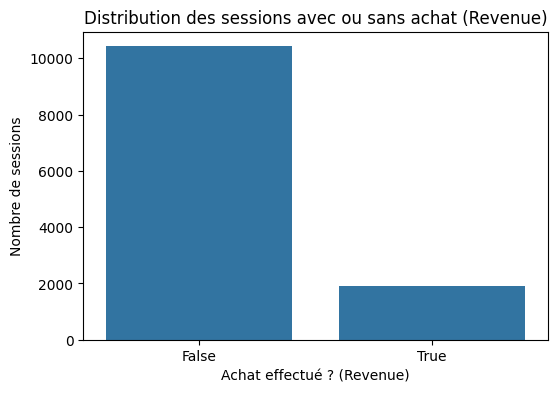

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(x='Revenue', data=data)
plt.title("Distribution des sessions avec ou sans achat (Revenue)")
plt.xlabel("Achat effectué ? (Revenue)")
plt.ylabel("Nombre de sessions")
plt.show()

Parfait ! On peut maintenant travailler avec les données : `reduced_data`.

## 7. Transformation des variables catégoriques
### 7.1. Conversion des booléens

In [141]:
reduced_data['Weekend'] = reduced_data['Weekend'].astype(int)
reduced_data['Revenue'] = reduced_data['Revenue'].astype(int)

### 7.2. Encodage one-hot des variables nominales

In [146]:
reduced_data.select_dtypes(include='object').columns

Index([], dtype='object')

In [147]:
categorical_cols = reduced_data.select_dtypes(include='object').columns.tolist()
reduced_data = pd.get_dummies(reduced_data, columns=categorical_cols, drop_first=True)

## 8. Normalisation / Standardisation

### 8.1. Standardisation des variables numériques

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Identifier les colonnes numériques sauf Revenue
num_cols = reduced_data.select_dtypes(include=['float64', 'int64']).columns.drop('Revenue', errors='ignore')

# Appliquer le scaler
reduced_data[num_cols] = scaler.fit_transform(reduced_data[num_cols])

## 9. Séparation en train/test

### 9.1. Features & cible

In [152]:
X = reduced_data.drop('Revenue', axis=1)
y = reduced_data['Revenue']

### 9.2. Split avec stratification

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## 10. Vérifications finales
### 10.1. Taille des jeux

In [154]:
print(f"Train set: {X_train.shape[0]} échantillons")
print(f"Test set: {X_test.shape[0]} échantillons")

Train set: 8631 échantillons
Test set: 3699 échantillons


### 10.2. Distribution des classes

In [155]:
print("Distribution des classes dans le train :")
print(y_train.value_counts(normalize=True))

print("Distribution des classes dans le test :")
print(y_test.value_counts(normalize=True))

Distribution des classes dans le train :
Revenue
0    0.845209
1    0.154791
Name: proportion, dtype: float64
Distribution des classes dans le test :
Revenue
0    0.845364
1    0.154636
Name: proportion, dtype: float64
